In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline


In [ ]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#  **DATA PROCESSING**

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges should be a float but is in object




In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is a categorical variable hence the distribution is not proper.

75% customers have tenure less than 55 months

Average Monthly cahrges are USD 64.76 Where 25% customers pay more than USD 89.85 months


In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

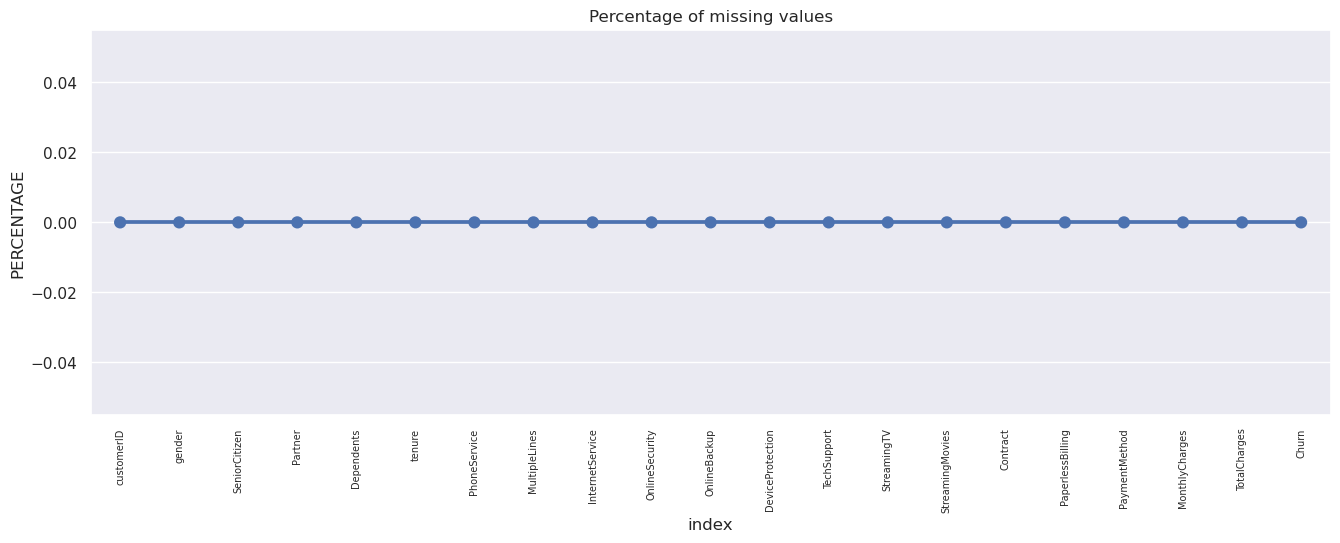

In [13]:
#calculating missing values
missing= pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot(x = 'index', y = 0, data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* Here, we dont't have missing values

# Data Cleaning

**1.** Creating a copy of data set for manuplation & processing

In [14]:
df_copy = df.copy()

**2.** TotalCharges should be numeric amount. Converting it to numerical data type

In [80]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
 # errors value will be replaced with NaN (Not a Number)
df_copy.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group        11
dtype: int64

As we dont have any missing values we are good to go ahead.

**3.** Looking at the **tenure** we can undestand it is given in months so we are going to dividing customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1 - 12, for tenure between 1 to 2 years, tenure group of 13 - 24, and so on 

In [16]:
# Getting the max tenure
print(df_copy['tenure'].max())

72


In [17]:
# Grouping the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11)for i in range(1, 72, 12)] #list  comprehension 

df_copy['tenure_group'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels = labels)


In [18]:
df_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**4.** Removing columns not required for processing

In [19]:
# droping column customerID and tenure
df_copy.drop(columns = ['customerID', 'tenure'], axis = 1, inplace =True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## EDA(Exploratory Data Analyis)

In the exploratory data analysis, I will be looking at the different Columns and try to understand the data with respect to churn so we can get some insides about the behaviour of the churning cuatomers. 

Lets begin by looking at the distribution of Churn customers.

## Pie Chart Churn Perentage

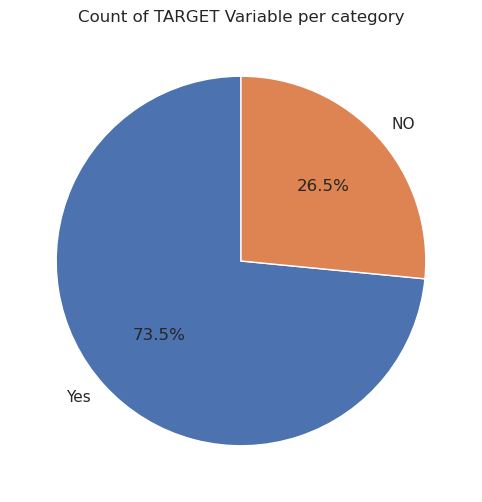

In [20]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(), labels=['Yes','NO'], autopct='%1.1f%%', startangle=90)
plt.title("Count of TARGET Variable per category")
plt.show()

In [21]:
100*df['Churn'].value_counts()/ len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [22]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From above figures we can conclude that:

* Data is highly imblanced, ratio = 73:27


## Univariate Analysis

**we can use below code to get all the analysis with respect to the churn but I am going to do it seprately so I can expain each plot**

In [ ]:
for i, variable in enumerate(df_copy.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df_copy, x = variable, hue = 'Churn')

## Gender

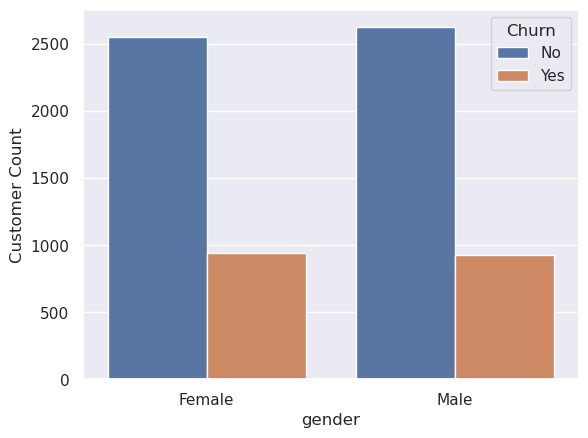

In [23]:
sns.countplot(x = "gender", data = df_copy, hue = 'Churn')
plt.ylabel('Customer Count')
plt.show()


The number of Male and Female customers are nearly same who chose to Churn

## Partner

<Axes: xlabel='Partner', ylabel='count'>

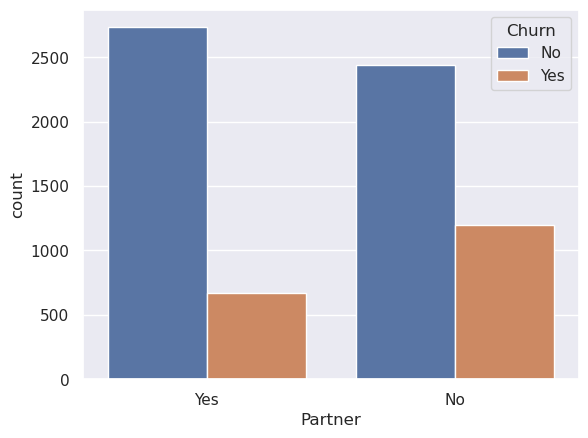

In [24]:
sns.countplot(x = "Partner", data = df_copy, hue = 'Churn')

customer who do not have partners tends to chrun more then who have.

## Senior Citizen

<Axes: xlabel='SeniorCitizen', ylabel='count'>

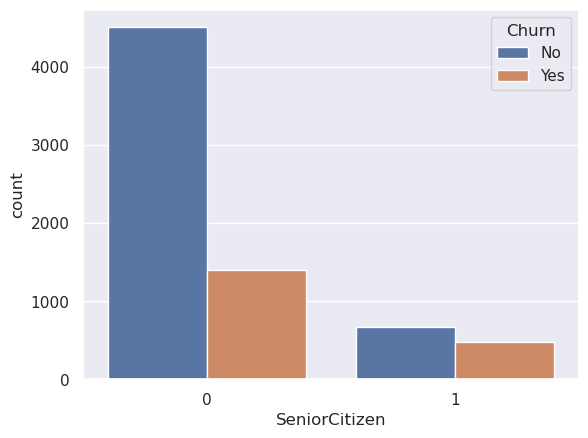

In [25]:
sns.countplot(x = "SeniorCitizen", data = df_copy, hue = 'Churn')

young customers are tends to have more churning rate then Seniorcitizen. From this we devlope some new markating statergy focousing on young customers

## Dependents

<Axes: xlabel='Dependents', ylabel='count'>

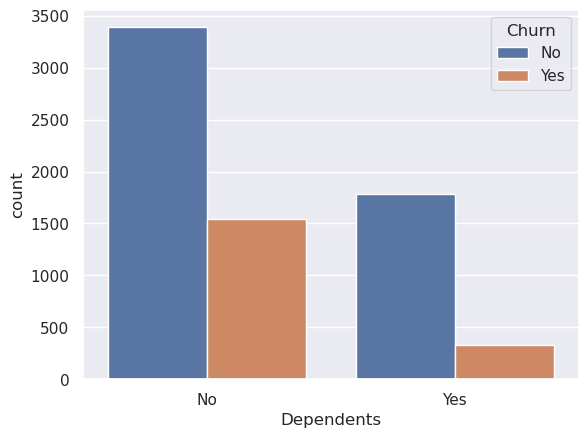

In [26]:
sns.countplot(x = "Dependents", data = df_copy, hue = 'Churn')

Customer who are not Dependents has heigher churning rate then who are dependent

## Phone Services

<Axes: xlabel='PhoneService', ylabel='count'>

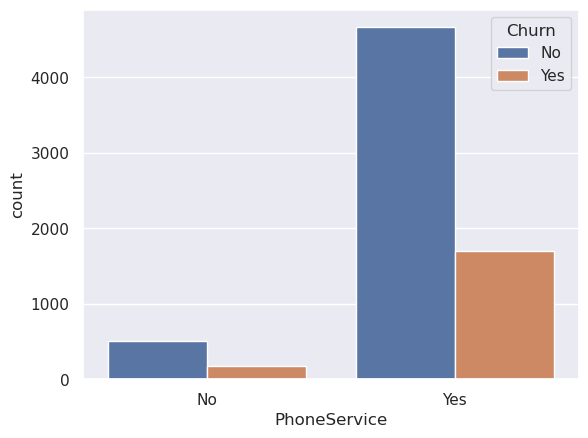

In [27]:
sns.countplot(x = "PhoneService", data = df_copy, hue = 'Churn')

Customers who opt for PhoneServices tends to churn more.

## Multiple Lines

<Axes: xlabel='MultipleLines', ylabel='count'>

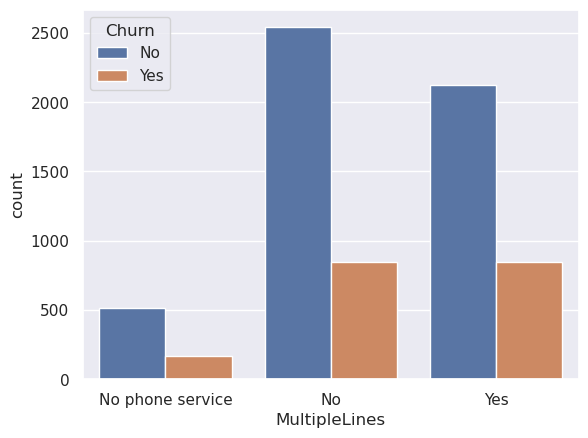

In [28]:
sns.countplot(x = "MultipleLines", data = df_copy, hue = 'Churn')


## Internet Services

<Axes: xlabel='InternetService', ylabel='count'>

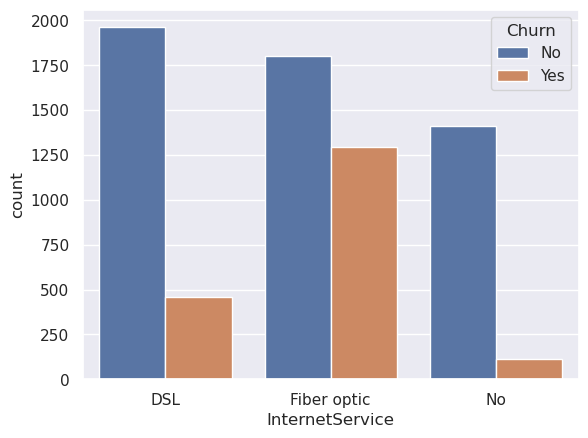

In [29]:
sns.countplot(x = "InternetService", data = df_copy, hue = 'Churn')

customers who opt for Fiber optic tends to churn more.

## Online Security

<Axes: xlabel='OnlineSecurity', ylabel='count'>

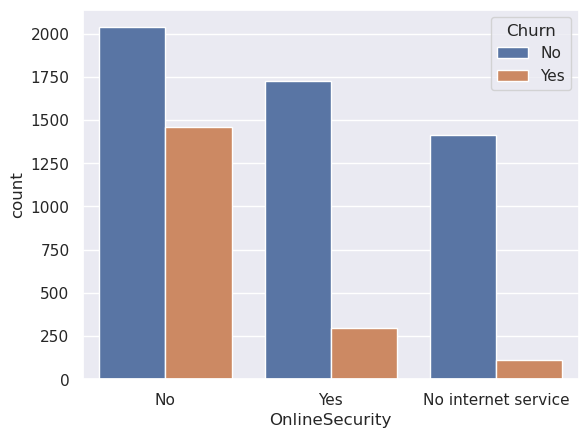

In [30]:
sns.countplot(x = "OnlineSecurity", data = df_copy, hue = 'Churn')

## Online Backup

<Axes: xlabel='OnlineBackup', ylabel='count'>

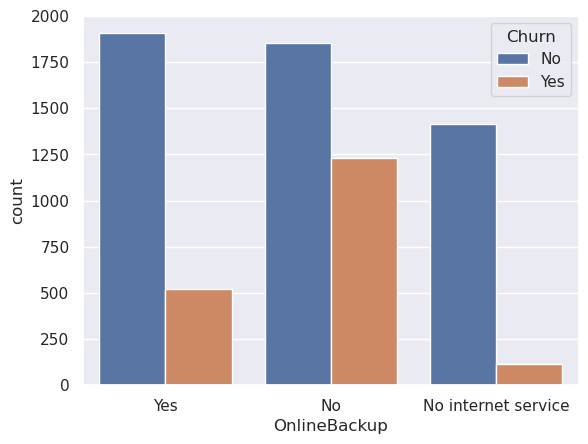

In [31]:
sns.countplot(x = 'OnlineBackup', data = df_copy, hue = 'Churn')

## Device Protection

<Axes: xlabel='DeviceProtection', ylabel='count'>

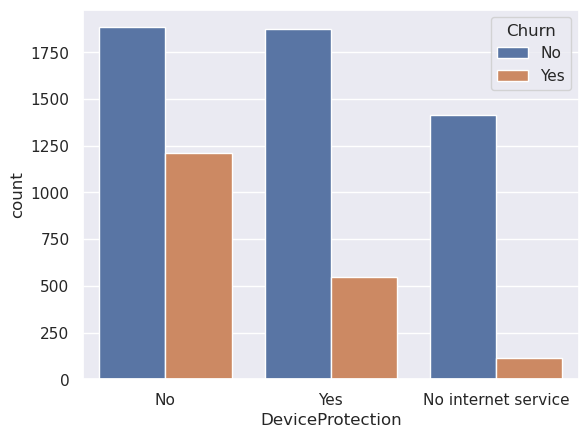

In [32]:
sns.countplot(x = "DeviceProtection", data = df_copy, hue = 'Churn')

## Tech Support

<Axes: xlabel='TechSupport', ylabel='count'>

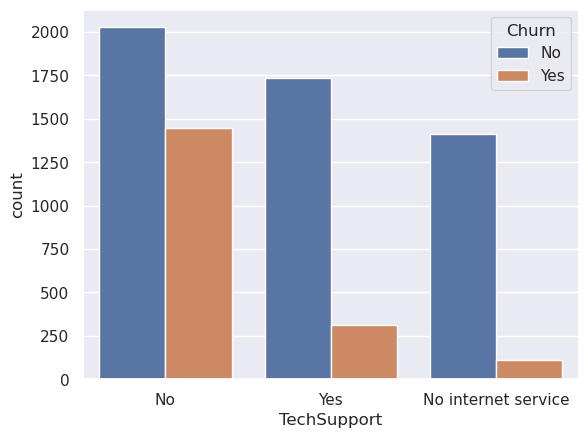

In [33]:
sns.countplot(x = 'TechSupport',data = df_copy, hue = 'Churn')

## Streaming TV

<Axes: xlabel='StreamingTV', ylabel='count'>

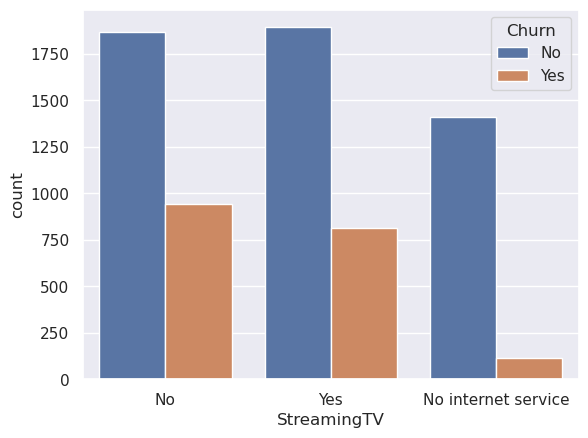

In [34]:
sns.countplot(x = "StreamingTV", data = df_copy, hue = 'Churn')

## Paperless Billing

<Axes: xlabel='PaperlessBilling', ylabel='count'>

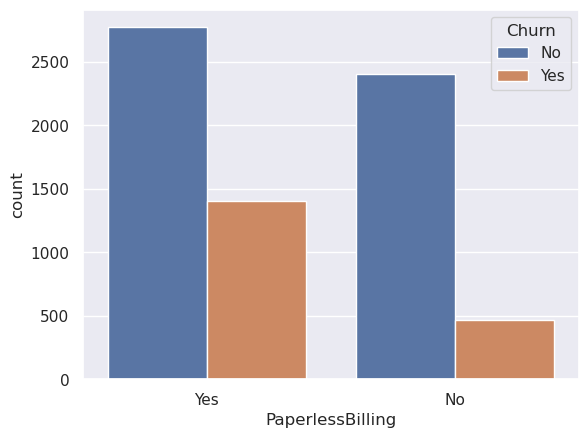

In [35]:
sns.countplot(x = "PaperlessBilling", data = df_copy, hue = 'Churn')

## Payment Method

<Axes: xlabel='PaymentMethod', ylabel='count'>

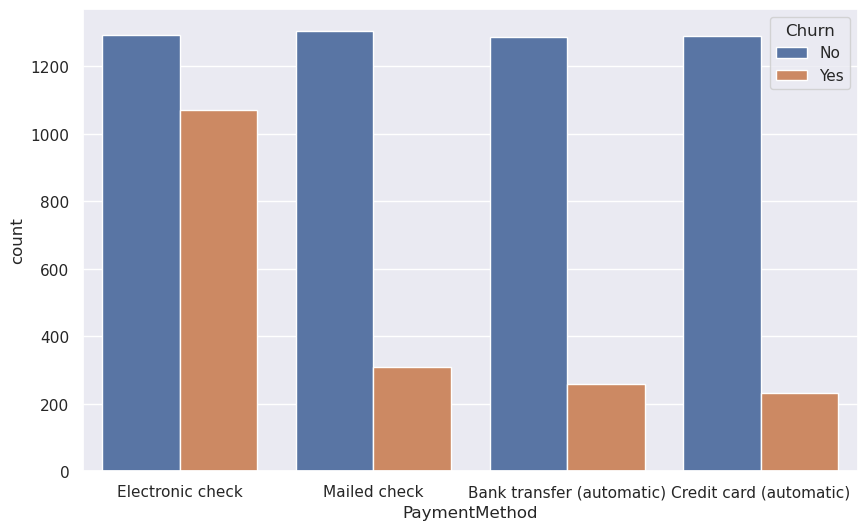

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "PaymentMethod", data = df_copy, hue = 'Churn')

## Contract

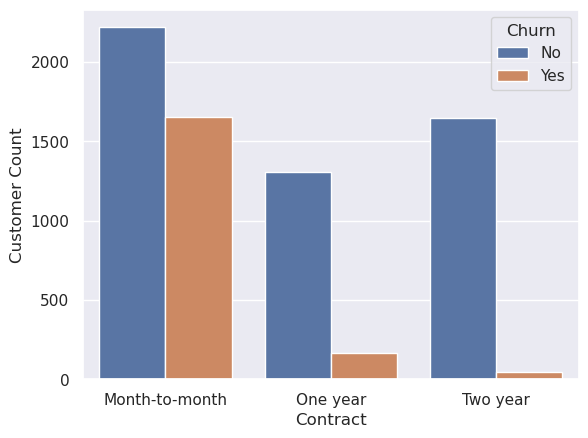

In [37]:
sns.countplot(x = "Contract", data = df_copy, hue = 'Churn')
plt.ylabel('Customer Count')
plt.show()


we can see that the customers who chose month to month contract has heigher churn number as comparsion to who opt for yearly contract

## Tenure Group

<Axes: xlabel='tenure_group', ylabel='count'>

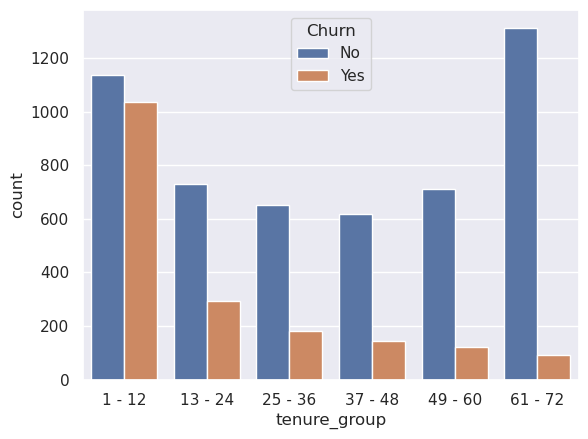

In [38]:
sns.countplot(x = "tenure_group", data = df_copy, hue = 'Churn')

customer who tends to chose yearly or month to month contract tends to churn more.

**2.** Converting the target variable **"Churn"** in a binary variable 
* Yes == 1
* No == 0

In [39]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)

In [40]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Converting all the categorical variables into dummy variables

In [41]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [42]:
df_copy_dummies.columns.values

array(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two ye

## **Churn by monthly Charges and Total charges**

Text(0.5, 1.0, 'Monthly charges by churn')

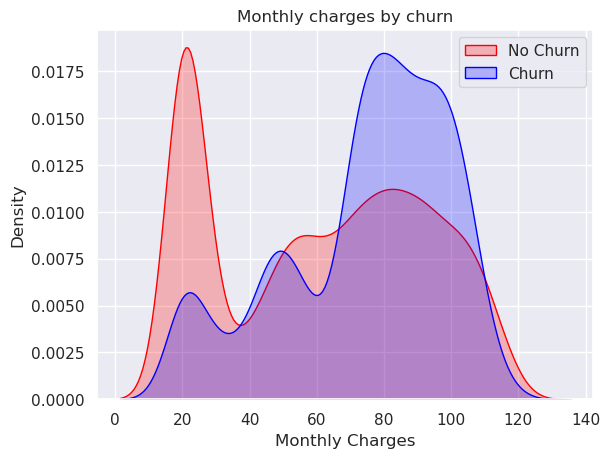

In [43]:
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0)], color = "Red", fill= True)
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1)], color = "Blue", fill= True)
Mth.legend(["No Churn", "Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

### Churn is high when Monthaly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

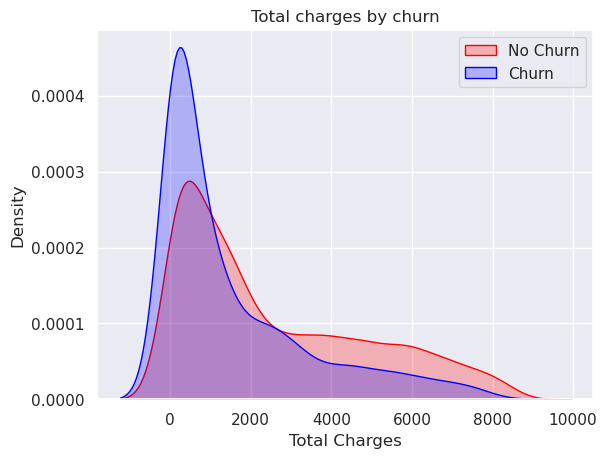

In [44]:
tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 0)], color = "Red", fill = True)
tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 1)], color = "Blue", fill = True)
tot.legend(["No Churn", "Churn"], loc = "upper right")
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total charges by churn')

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge and higher Churn.

Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

## Corelation of all parameters with Churn

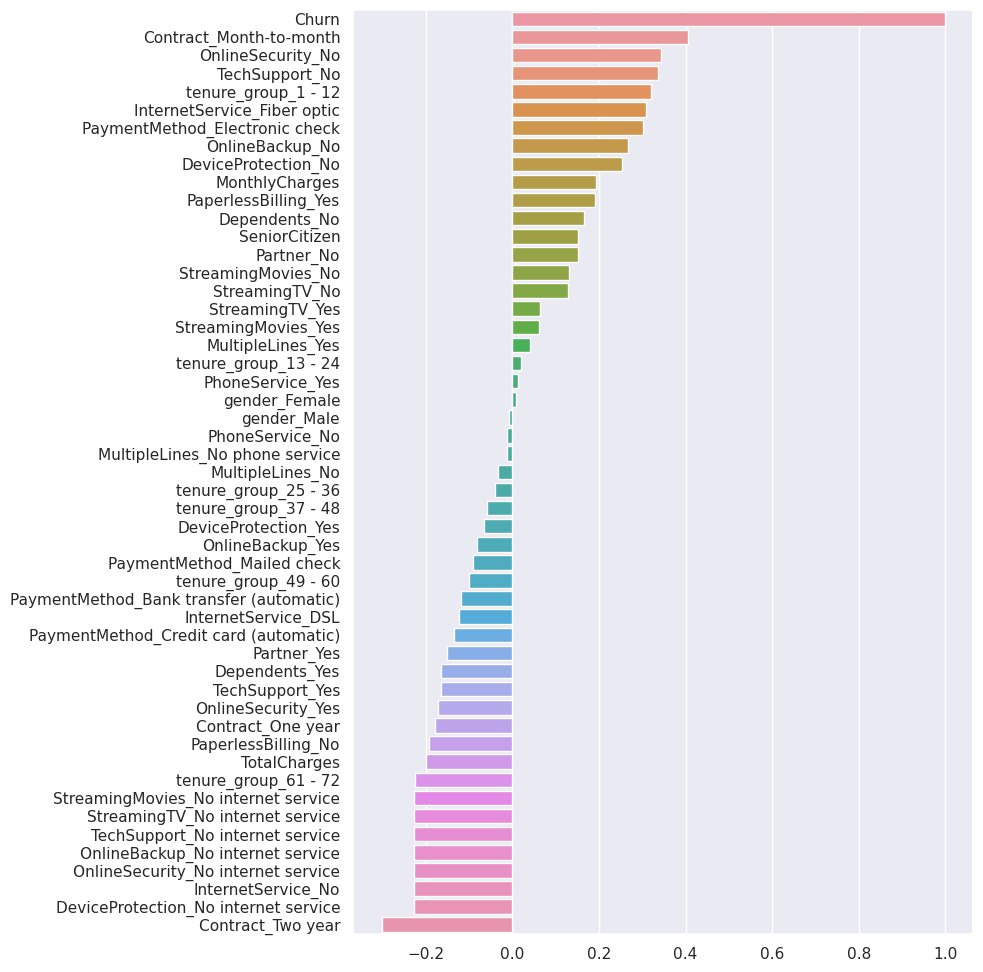

In [45]:
plt.figure(figsize=(8, 12))
correlation = df_copy_dummies.corr()["Churn"].sort_values(ascending=False)
sns.barplot(y=correlation.index, x=correlation.values)
plt.show()


### **Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below.

<Axes: >

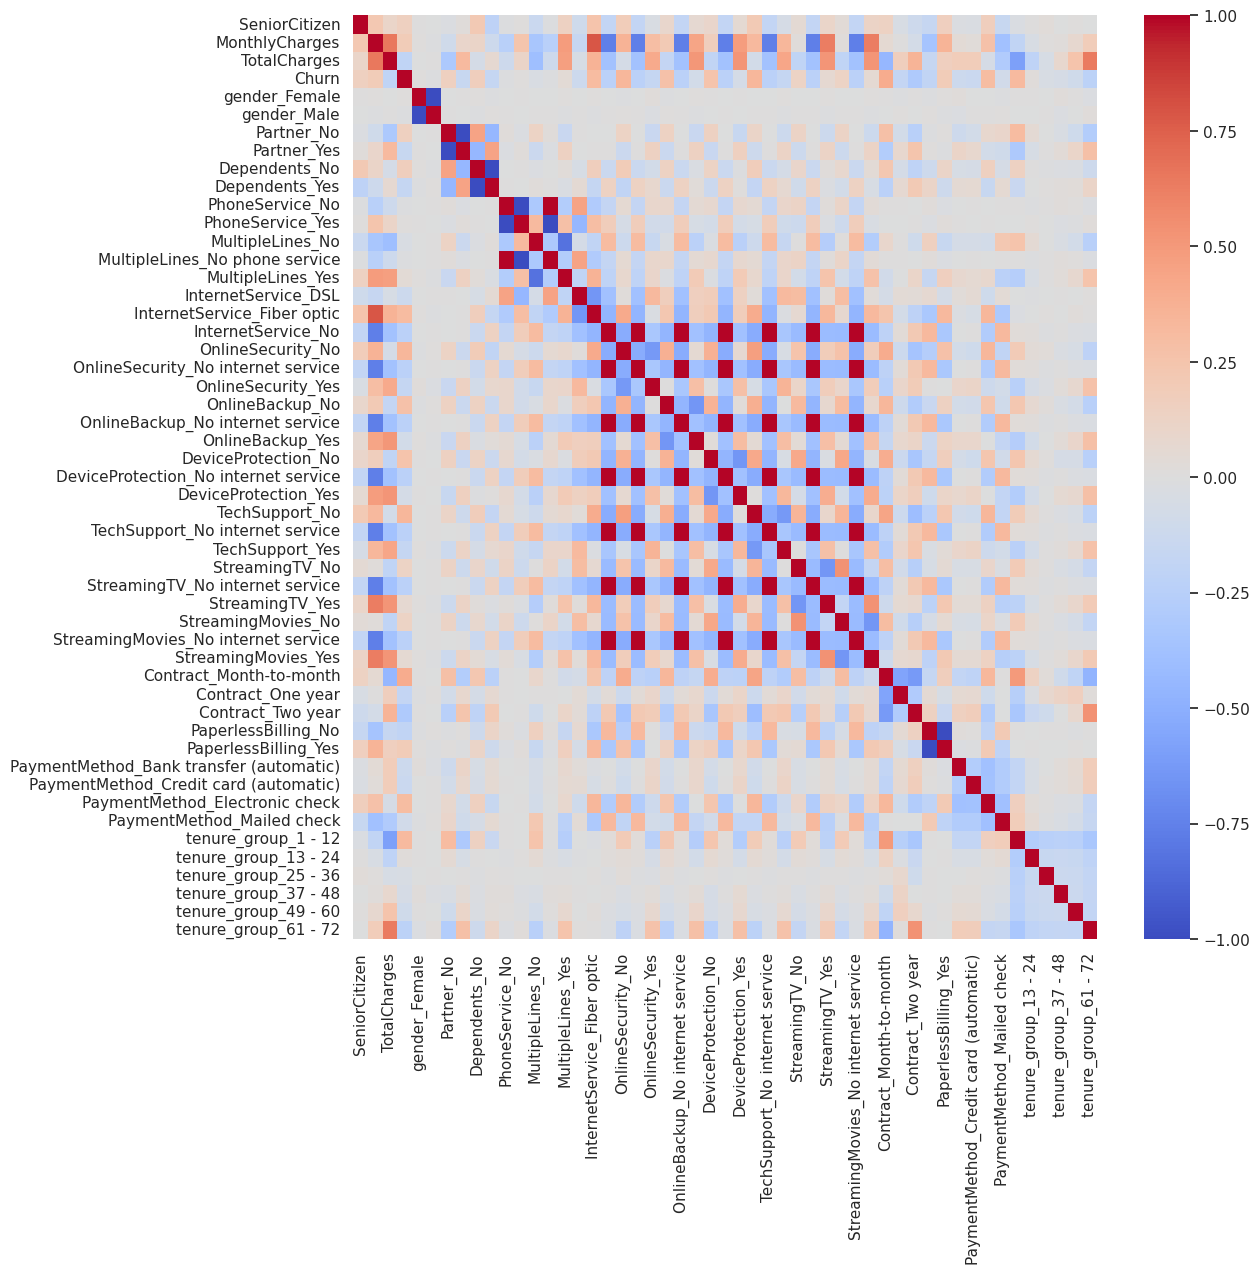

In [46]:
#coorelation heatmap
plt.figure(figsize=(12,12)) 
sns.heatmap(df_copy_dummies.corr(), cmap='coolwarm')

## Bivariate Analysis

As we are more intrested in the Churners I am going to analyse the churners with related to different insides we get from above analaysis on the paramters where the churnner are heigh 

In [47]:
#Creating new data Frame for churnners and not churnners
new_df_target0 = df_copy.loc[df_copy["Churn"] ==0]
new_df_target1 = df_copy.loc[df_copy['Churn'] == 1]

In [48]:
# defining function to plot 
def uniplot(df, col, title, hue = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 20
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 4 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

## Distribution of Churner with respect to Partner

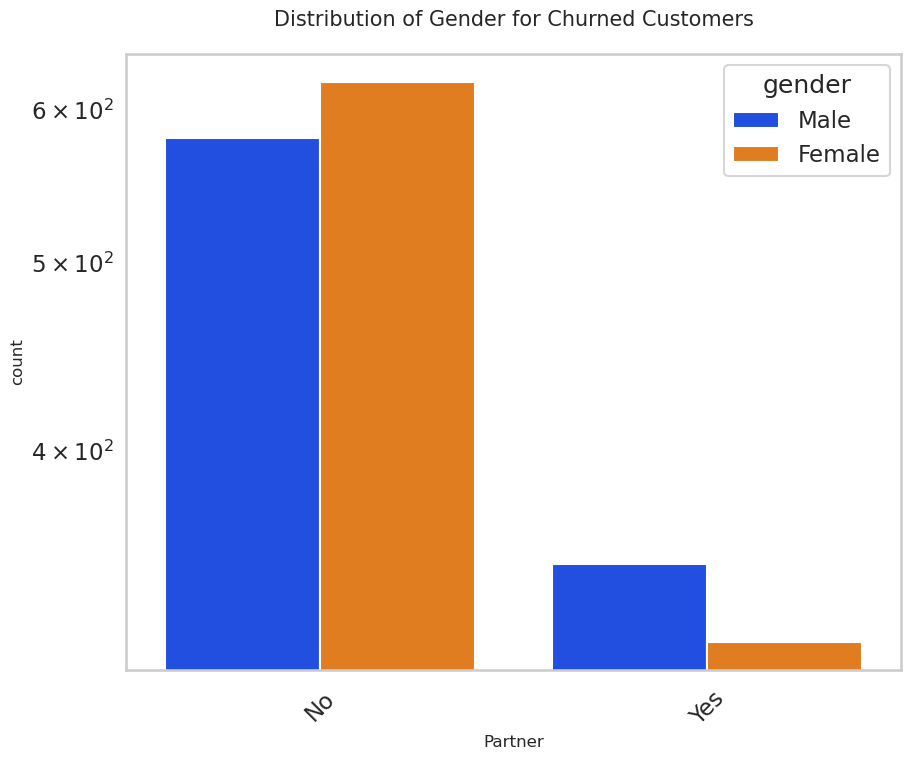

In [49]:
uniplot(new_df_target1,col = 'Partner', title = 'Distribution of Gender for Churned Customers', hue = 'gender')

Nothing very intresting insides but we can see the Males who has Partner tends to Churn more

## Distribution of Churner with respect to PaymentMethod

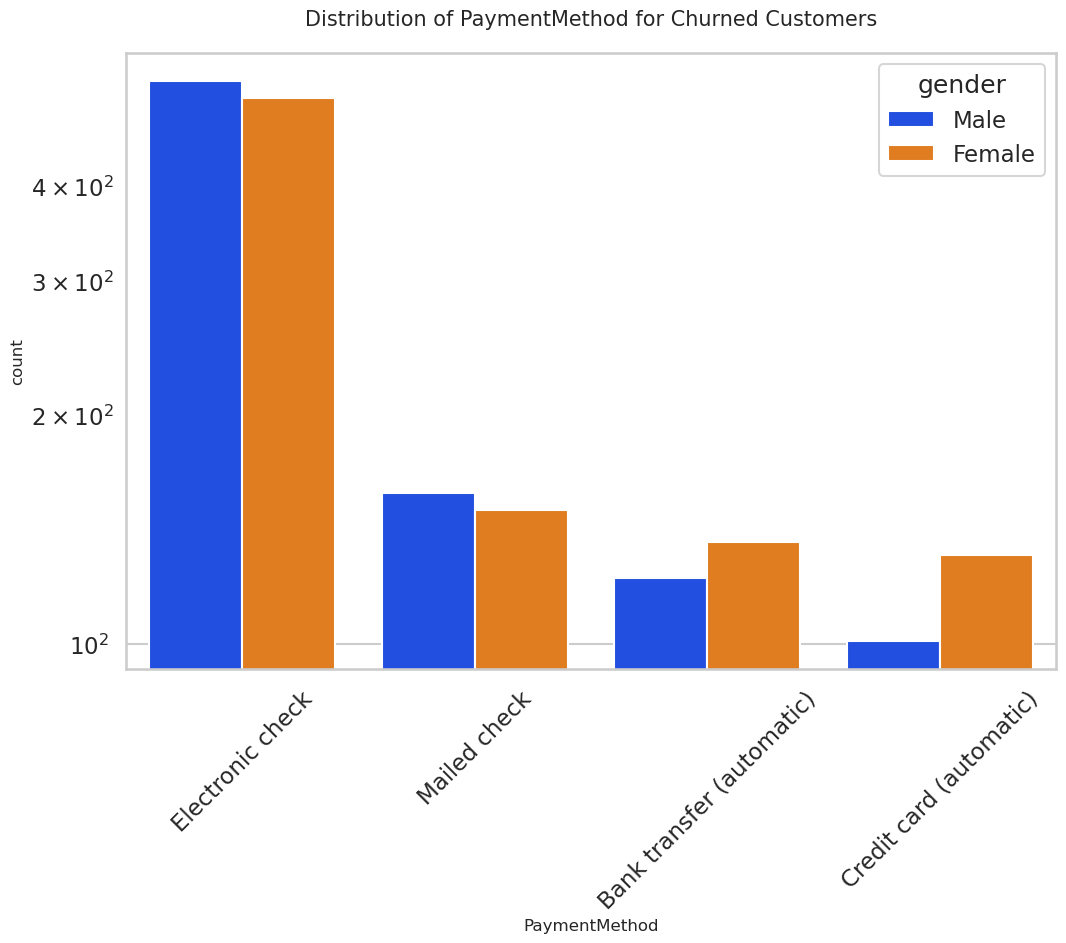

In [50]:
uniplot(new_df_target1, col = 'PaymentMethod', title = 'Distribution of PaymentMethod for Churned Customers', hue = 'gender')

we can see the Females who opt for automatic Payment Method tends to churn more.

## Distribution of Churner with respect to Contracts

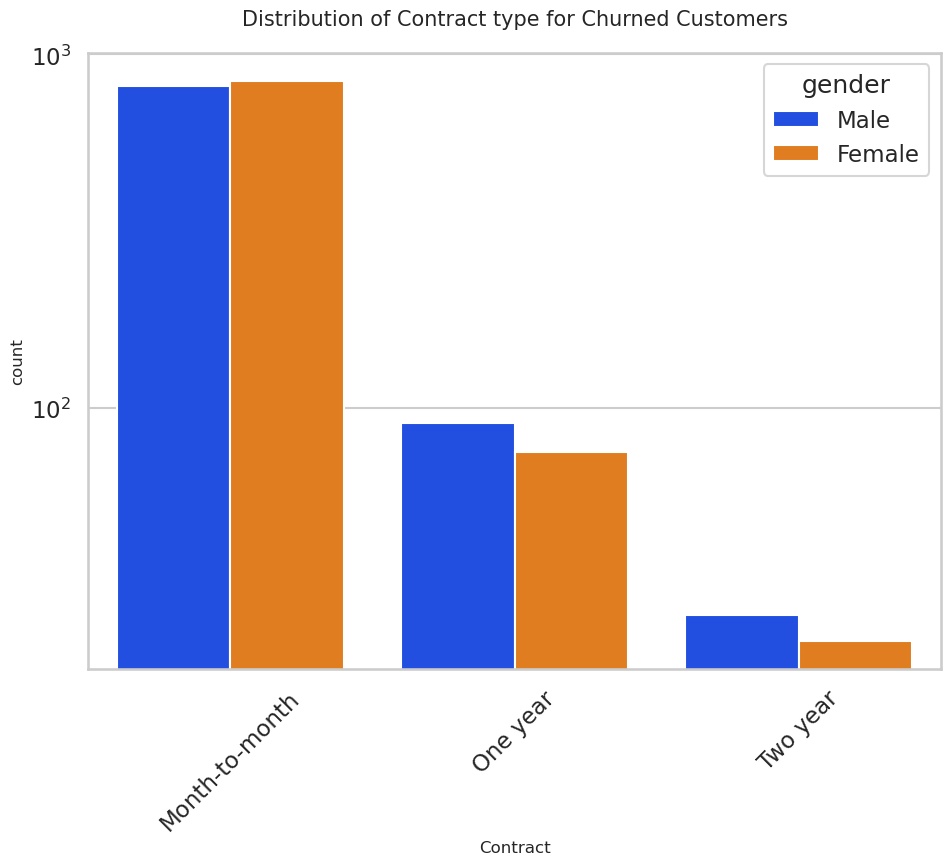

In [51]:
uniplot(new_df_target1, col = 'Contract', title = 'Distribution of Contract type for Churned Customers', hue = 'gender')

Nothing very intresting here custumor who chose long term contract are non churnners

## Distribution of Churner with respect to InternetServices

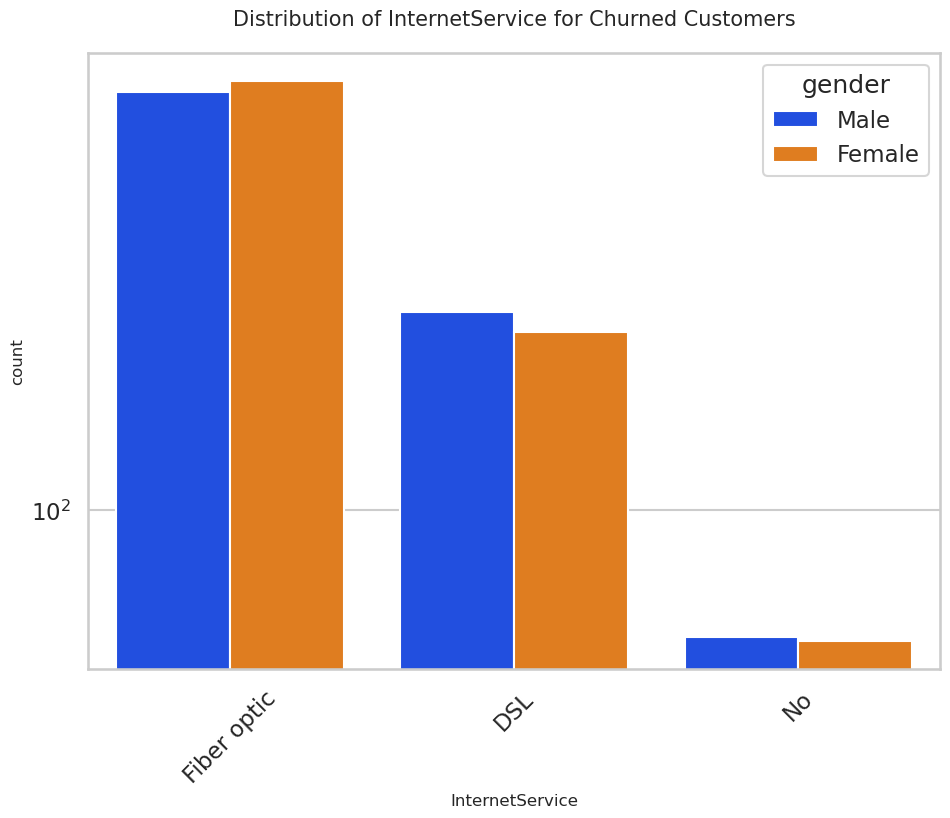

In [52]:
uniplot(new_df_target1, col = 'InternetService', title = 'Distribution of InternetService for Churned Customers', hue = 'gender')

## Distribution of Churner with respect to Senior Citizen

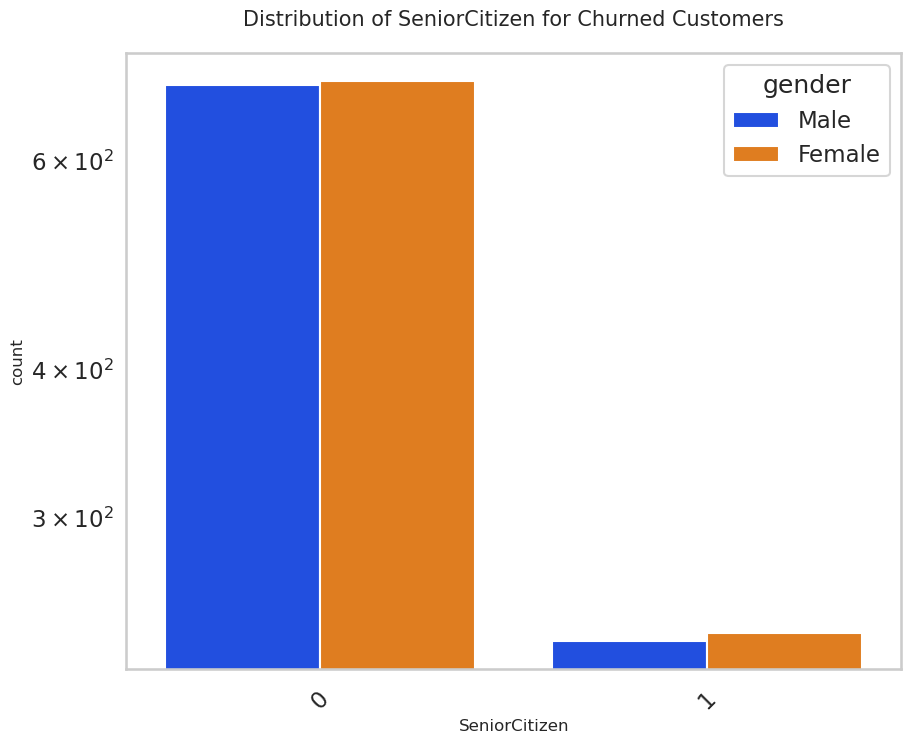

In [53]:
uniplot(new_df_target1, col = 'SeniorCitizen', title = 'Distribution of SeniorCitizen for Churned Customers', hue = 'gender')

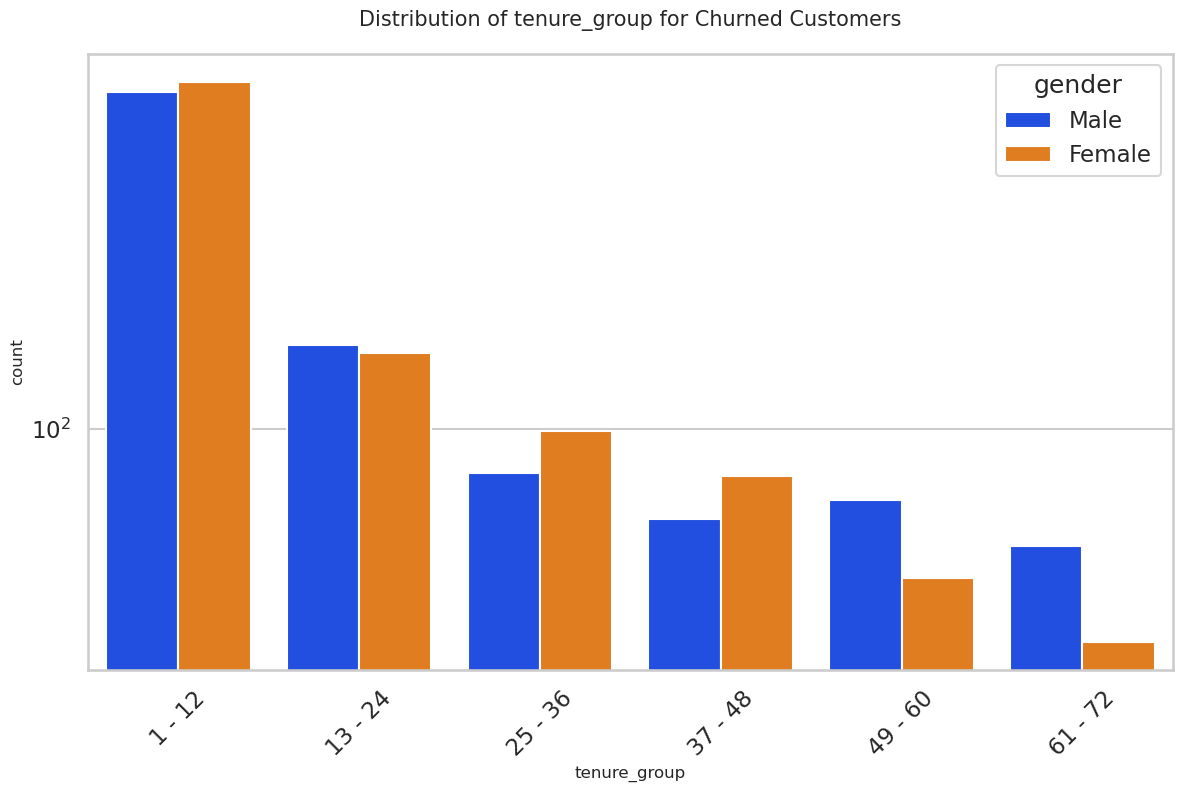

In [54]:
uniplot(new_df_target1, col = 'tenure_group', title = 'Distribution of tenure_group for Churned Customers', hue = 'gender')

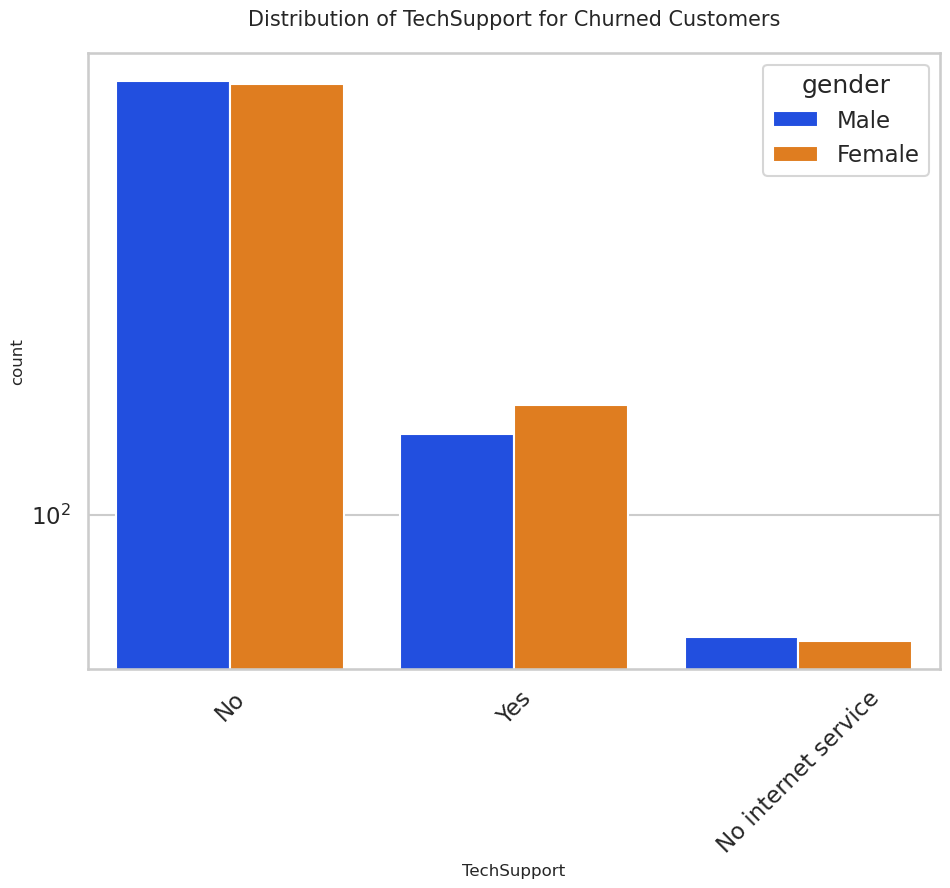

In [55]:
uniplot(new_df_target1, col = 'TechSupport', title = 'Distribution of TechSupport for Churned Customers', hue = 'gender')

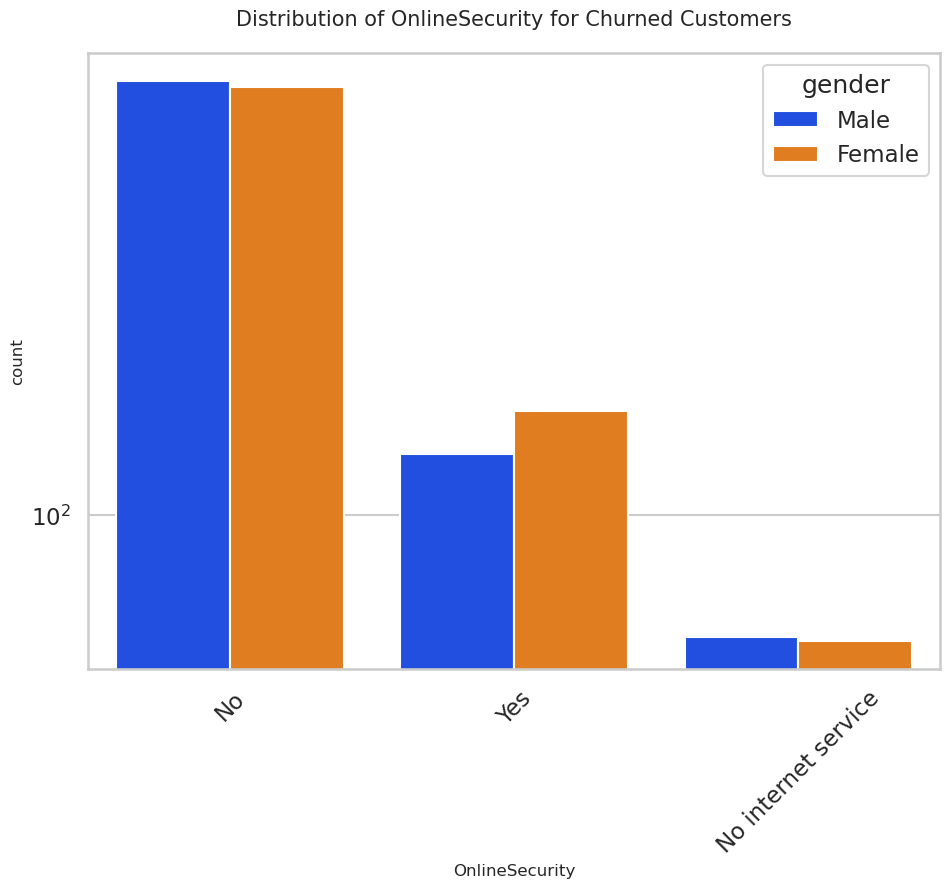

In [56]:
uniplot(new_df_target1, col = 'OnlineSecurity', title = 'Distribution of OnlineSecurity for Churned Customers', hue = 'gender')

# Conclusion

### **Insights**
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners


In [95]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [96]:
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [99]:
# Creating X and Y variable
df_copy_dummies.dropna(how = 'any', inplace = True)
x = df_copy_dummies.drop('Churn', axis =1)
x
 

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [100]:
y = df_copy_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


# Decision Tree Classifier

In [102]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)

In [103]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [104]:
y_pred = model_dt.predict(x_test)

In [105]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [106]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1006
           1       0.64      0.49      0.56       401

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.78      0.77      1407



In [109]:
print(confusion_matrix(y_test, y_pred))

[[894 112]
 [203 198]]


while making model we always comsider minoraity class which is 1 and has low pecision score as the dataset is imbalanced 73:27. although the accurecy is good 75% but the model will jot be considered good. As the model is imblanced wew are going to use Over and under sampling.

# SMOTEENN

In [159]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [160]:
#creating new variables
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2) 

In [161]:
# Creating model
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)


In [162]:
# training the model
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [163]:
#predicitng the churn 
y_pred_smote = model_dt_smote.predict(xr_test)

In [164]:
print(classification_report(yr_test, y_pred_smote, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       530
           1       0.92      0.94      0.93       640

    accuracy                           0.92      1170
   macro avg       0.92      0.92      0.92      1170
weighted avg       0.92      0.92      0.92      1170



### Evaluating the Decision Tree Regressor Model

In [165]:
dft = pd.DataFrame({'Actual': yr_test, 'Predicted': y_pred_smote})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


/tmp/ipykernel_32/1852095234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
/tmp/ipykernel_32/1852095234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Pr

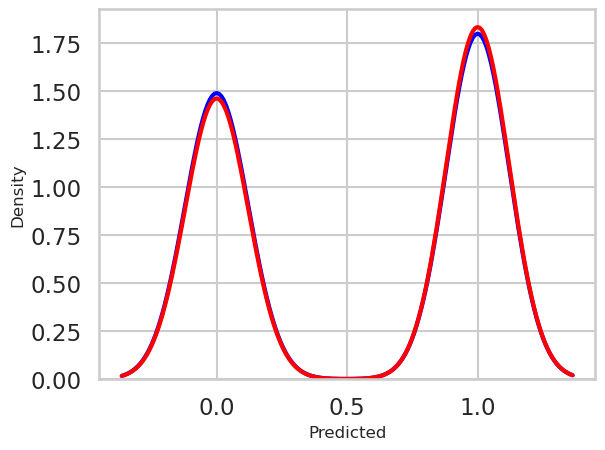

In [169]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
sns.distplot(dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted');

The blue shows the distribution count foractual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

## Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
sm = SMOTEENN()
x_resampled_rf, y_resampled_rf = sm.fit_resample(x,y)

In [175]:
#creating new variables
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled_rf, y_resampled_rf, test_size = 0.2) 

In [176]:
model_smote_rf = RandomForestClassifier(n_estimators = 100 ,criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)

In [177]:
model_smote_rf.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [178]:
y_pred_smote_rf = model_smote_rf.predict(xr_test)

In [183]:
model_smote_rf.score(xr_train, yr_train)

0.943332631135454

In [179]:
print(classification_report(yr_test, y_pred_smote_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       543
           1       0.93      0.97      0.95       644

    accuracy                           0.95      1187
   macro avg       0.95      0.94      0.94      1187
weighted avg       0.95      0.95      0.95      1187



/tmp/ipykernel_32/2246622980.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
/tmp/ipykernel_32/2246622980.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Pr

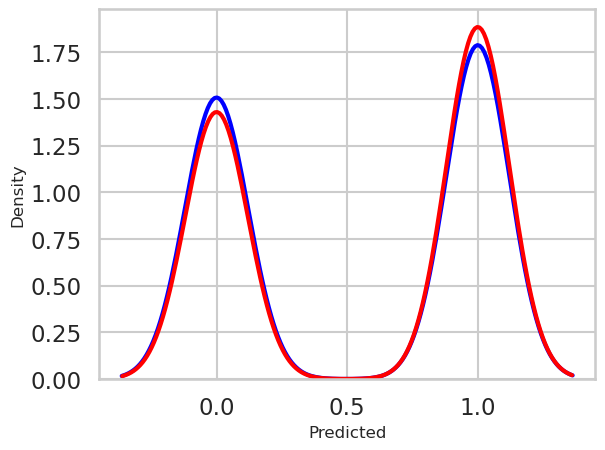

In [180]:
dft = pd.DataFrame({'Actual': yr_test, 'Predicted': y_pred_smote_rf})
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
sns.distplot(dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted');